In [636]:
import numpy as np
import matplotlib.pyplot as plt

## Data generation

In [853]:
# Good, but 2 CLASSES ONLY
# alpha increases spread
# beta increases jitter
def generate_data(n, alpha=0.1, beta=1, add_bias=True):
    data = np.empty((n, 2))
    # Define an initial point
    data[0, :] = 1
    
    # Randomly "scale" the upcoming reflection
    a = np.random.uniform(low=(-1-alpha), high=(-1+alpha), size=n)
    
    # "Flip" previous point and add some noise
    for k in range(1, n):
        data[k, ] = a[k]*data[k-1, :] + beta*np.random.normal(0, 1, size=2)
    
    # Add a bias variable
    if add_bias:
        data = np.hstack((np.ones((n, 1)), data))
    
    # Labels are two classes (0, 1), strictly alternating, because of "flipping" above
    labs = np.array([0, 1]*(n//2 + 1))[:n]
    
    return data, labs

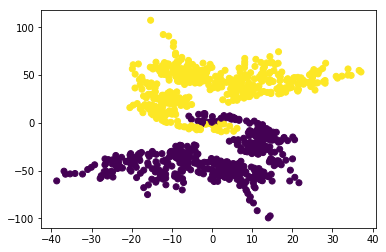

In [865]:
demo_data, demo_labs = generate_data(1000)

plt.scatter(demo_data[:, 1], demo_data[:, 2], c=demo_labs)

## Logistic regression

In [866]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [867]:
sigmoid(1)

0.7310585786300049

In [868]:
def predict(features, weights):
    Z = np.dot(features, weights)
    return sigmoid(Z)

In [906]:
init_weights = np.repeat(0.1, 3)

In [907]:
pp = predict(demo_data, init_weights)
pp.shape, pp.sum()

((1000,), 507.3764384972019)

In [908]:
def classify(predictions, threshold=0.5):
    return (predictions >= threshold).astype(int)

In [909]:
classify(pp)[:10]

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

In [910]:
def get_cost(features, labels, weights):
    
    m = features.shape[0]
    preds = predict(features, weights)
    
    # Log-loss cost function
    cost = -(labels*np.log(preds) + (1-labels)*np.log(1-preds)).sum()
    
    # Average cost per observation
    return cost/m
    

In [911]:
get_cost(demo_data, demo_labs, init_weights)

0.20349175655631288

In [912]:
def update(features, labels, weights, rate):
    
    m = features.shape[0]
    
    preds = predict(features, weights)
    
    # Average gradient over all observations, times learning rate
    grad = rate * np.dot(features.T, (preds - labels)) / m
    
    return weights-grad
    

In [913]:
update(demo_data, demo_labs, weights, 0.1)

array([0.4987363 , 0.3892941 , 0.54785028])

In [914]:
def train(features, labels, weights, rate, iters, verbose=True):

    cost = get_cost(features, labels, weights)
    
    if verbose:
        print("Training in progress...")
        print("")
        print("Iter | Cost")
        print("---- | ----")
        print("0000 |", cost)

    cost_history = np.empty(iters+1)
    cost_history[0] = cost
    
    for k in range(1, iters+1):
        
        weights = update(features, labels, weights, rate)
        cost = get_cost(features, labels, weights)
        cost_history[k] = cost
        
        if verbose and k % 1000 == 0:
            print(k, "|", cost)
    
    if verbose:
        print("")
        print("Training complete!")
        print("Iterations completed:", k)
        print("Final cost:", cost)
    
    return weights, cost_history

In [918]:
opt_weights, ch = train(demo_data, demo_labs, weights, rate=0.1, iters=2000)

C:\Users\ojones\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\ojones\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


Training in progress...

Iter | Cost
---- | ----
0000 | nan
1000 | 0.08527172874825396
2000 | 0.08524682385110935

Training complete!
Iterations completed: 2000
Final cost: 0.08524682385110935


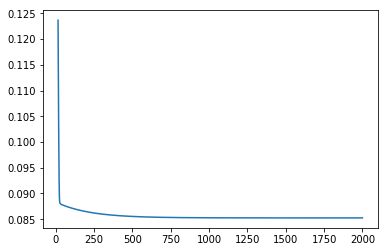

In [919]:
plt.plot(ch)

In [920]:
opt_weights

array([ 0.00039315, -0.13455033,  0.17240935])

In [921]:
preds = predict(demo_data, opt_weights)
preds_classes = classify(preds)

In [922]:
def accuracy(predicted, actual):
    return np.mean(predicted == actual)

In [923]:
accuracy(preds_classes, demo_labs)

0.938

In [1012]:
def plot_boundary(data, labels, weights, subdivs=1000, alpha=0.1):
    
    fig, ax = plt.subplots()
    ax.scatter(data[:, 1], data[:, 2], c=labels)
    
    xmin, xmax = ax.get_xlim()
    xstep = (xmax-xmin)/subdivs
    ymin, ymax = ax.get_ylim()
    ystep = (ymax-ymin)/subdivs
    
    grid = np.mgrid[xmin:xmax:xstep, ymin:ymax:ystep].reshape(2, -1).T
    n = grid.shape[0]
    grid_with_bias = np.hstack((np.ones((n, 1)), grid))
    
    ax.contourf(np.arange(xmin, xmax, xstep), np.arange(ymin, ymax, ystep),
               classify(predict(grid_with_bias, weights)).reshape(-1, subdivs).T,
               alpha = alpha)
    
    
    ax.scatter(data[:, 1], data[:, 2], c=labels)
    return None

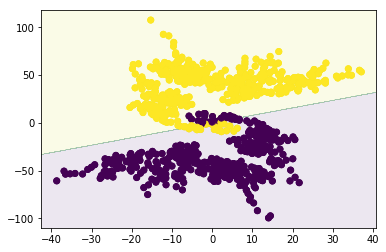

In [1013]:
plot_boundary(demo_data, demo_labs, opt_weights)